# Name : Touseef Asif
# Code Alpha Intership
# Task 02 : Predictive Modeling with LInear Regression.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [10,5]

In [5]:
d = pd.read_csv("/USA_Housing.csv")
df = pd.DataFrame(d)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.shape
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


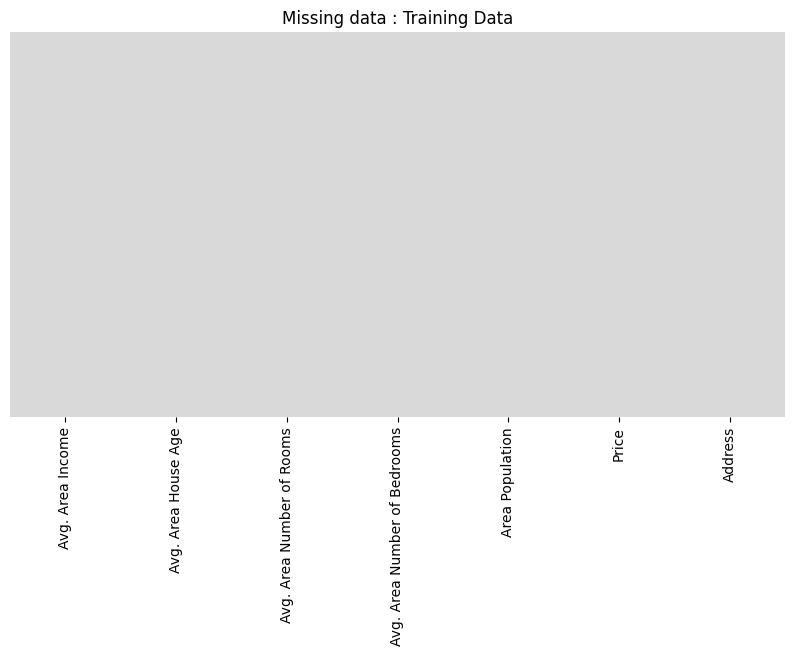

In [7]:
# Missing Data
### Heatmap will help better visualize what features as missing the most information.
sns.heatmap(data  = df.isnull(), yticklabels = False, cbar = False, cmap = "tab20c_r")
plt.title("Missing data : Training Data")
plt.show()

In [8]:
df.drop("Address", axis = 1, inplace = True)
df.dropna(inplace  = True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
df.shape
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
x = df.drop("Price", axis = 1)
y = df["Price"]

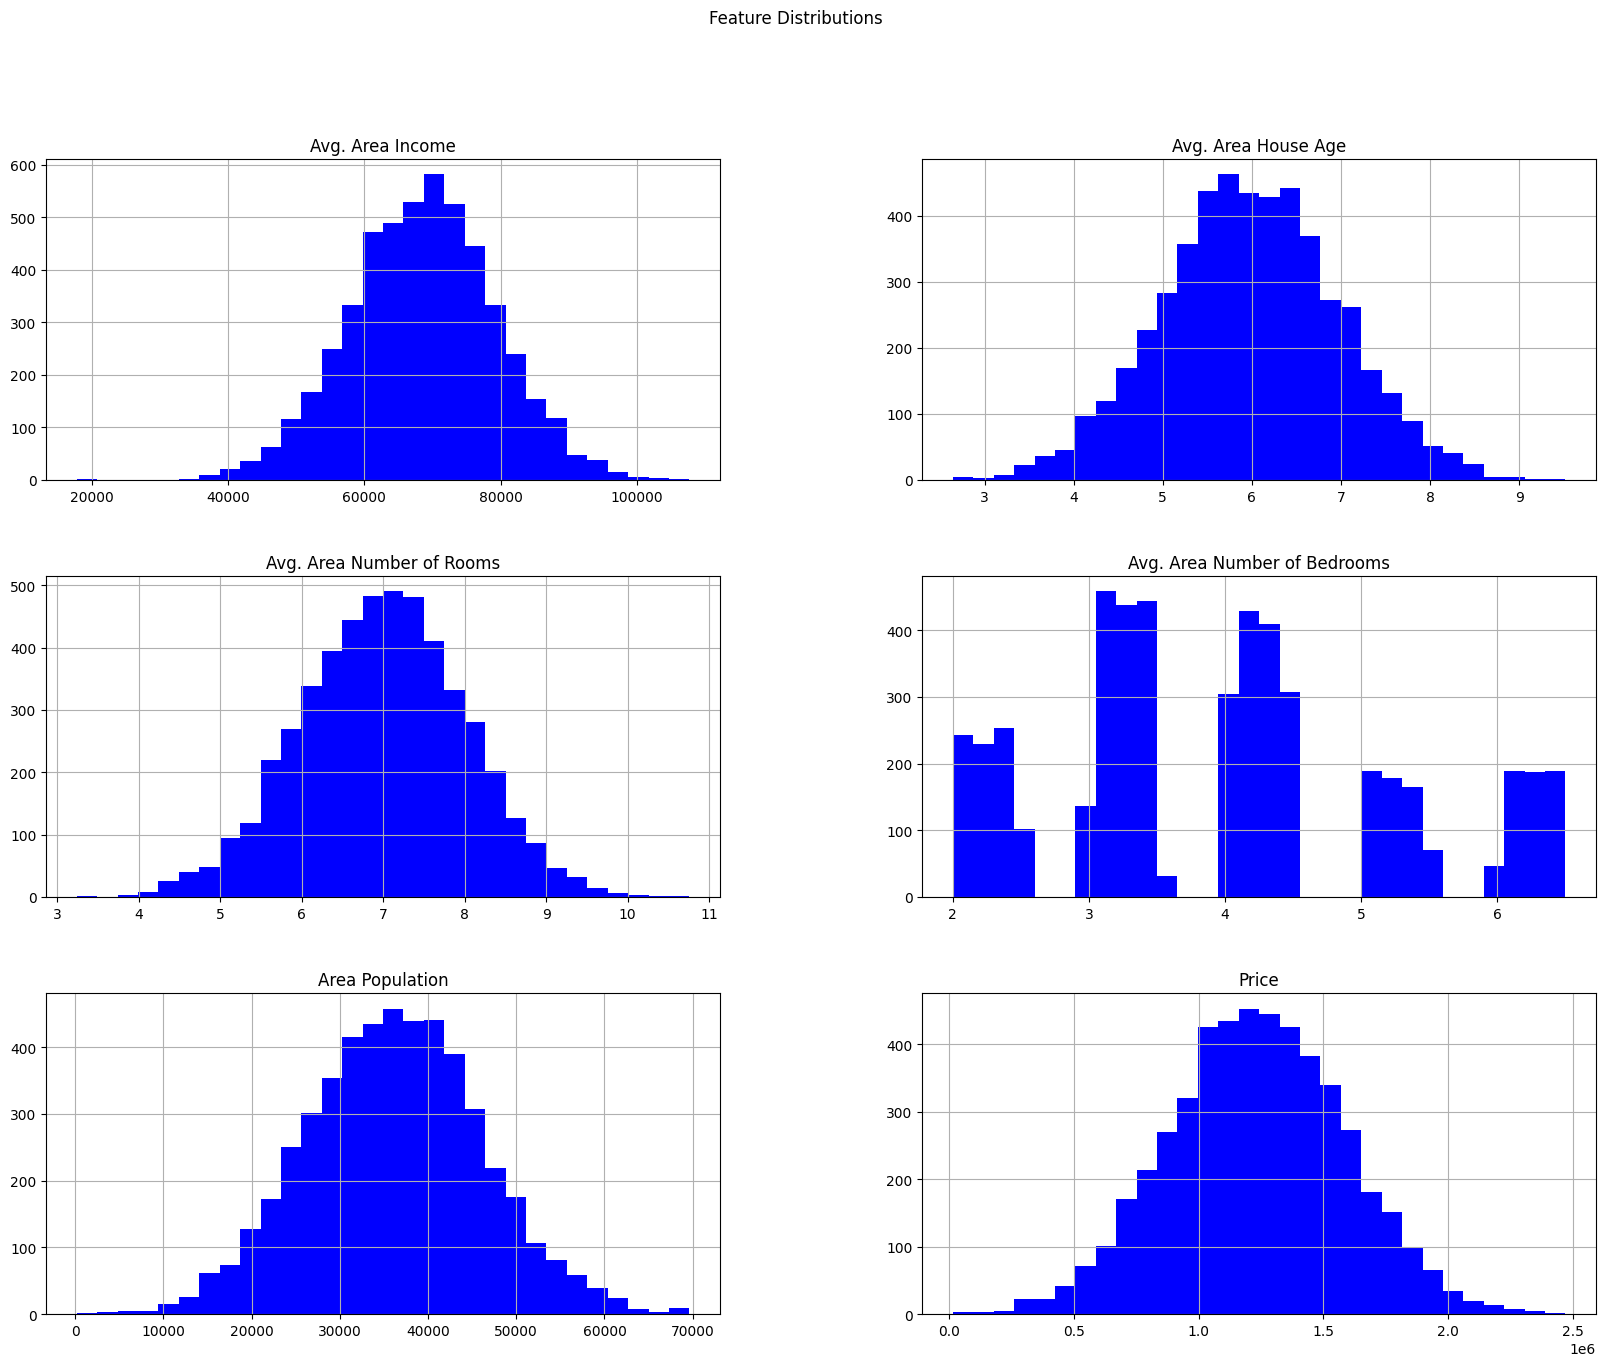

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [11]:
# Visualize the distribution of features
df.hist(bins=30, figsize=(20, 15), color='blue')
plt.suptitle("Feature Distributions")
plt.show()
x.head()

In [12]:
## Feauters split into test and train set
x = df.drop("Price", axis = 1)
y = df["Price"].values  # Convert to a numpy array
y_reshaped = y.reshape(-1, 1)  # Reshape to 2D
y.ndim
# Always we says input for x and output for y
x.shape
y.shape


(5000,)

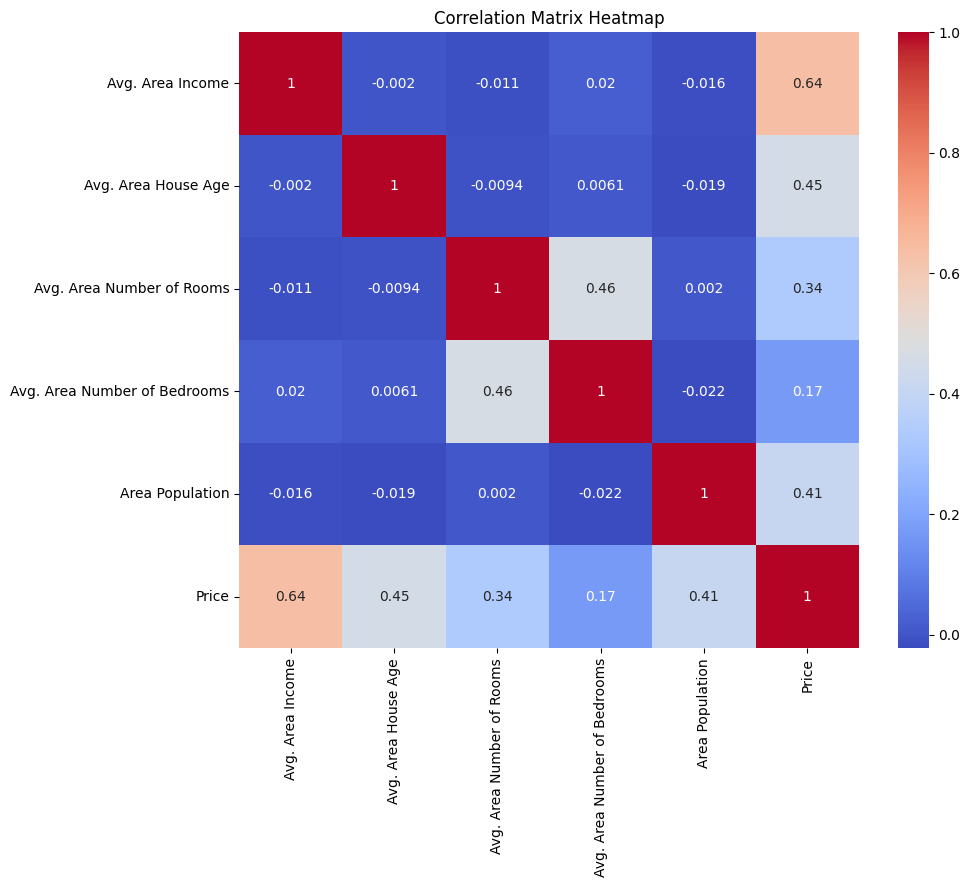

In [13]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:

from sklearn import preprocessing
import numpy as np
pre_process = preprocessing.StandardScaler().fit(x).fit(y_reshaped)
x_transform = pre_process.fit_transform(x)
y_transform = pre_process.fit_transform(y_reshaped)
x_transform.shape, y_transform.shape
x_transform, y_transform

(array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
        [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
        [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
        ...,
        [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
        [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
        [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]]),
 array([[-0.49008146],
        [ 0.77550829],
        [-0.49021053],
        ...,
        [-0.570244  ],
        [-0.0946402 ],
        [ 0.18941143]]))

In [29]:
# use x and y to split the Data into the Train and Test data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x_transform,y_transform , test_size= 0.10, random_state = 101)


In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4500, 5)
(500, 5)
(4500, 1)
(500, 1)


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500, 1)
[[ 7.08770782e-02]
 [-1.16116236e+00]
 [ 1.43709251e+00]
 [-7.33380624e-01]
 [-6.74500500e-01]
 [-1.66062709e+00]
 [-4.46524314e-01]
 [-1.06379917e+00]
 [ 6.03190733e-01]
 [-8.56030840e-02]
 [ 6.29889563e-01]
 [ 1.82706221e-01]
 [ 1.42965357e+00]
 [ 2.96310328e-01]
 [ 4.36746182e-01]
 [-2.53490585e-02]
 [-1.74529237e+00]
 [-7.57775229e-01]
 [-2.84693278e-02]
 [-9.78251659e-02]
 [-2.05423965e+00]
 [ 1.51755468e+00]
 [ 1.76377221e+00]
 [-9.50239580e-02]
 [-4.72094032e-01]
 [ 1.63737167e+00]
 [ 1.51737311e+00]
 [ 5.89353567e-01]
 [ 4.36300139e-01]
 [ 8.72035453e-01]
 [-1.42321126e+00]
 [ 1.47943417e+00]
 [ 6.60470410e-01]
 [-5.83577393e-01]
 [ 1.45693861e-01]
 [-8.90399530e-01]
 [-1.31390376e-01]
 [-6.56885801e-01]
 [ 2.75494242e-01]
 [-1.26828883e+00]
 [ 4.54443104e-01]
 [-1.85651710e+00]
 [-1.15725850e+00]
 [ 1.87441444e+00]
 [ 1.24473266e+00]
 [-7.57196219e-01]
 [-2.91126861e-01]
 [-1.24474568e+00]
 [-2.05876114e-01]
 [ 6.82947244e-01]
 [ 6.44197274e-01]
 [-1.91399546e-01]
 [-

In [33]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

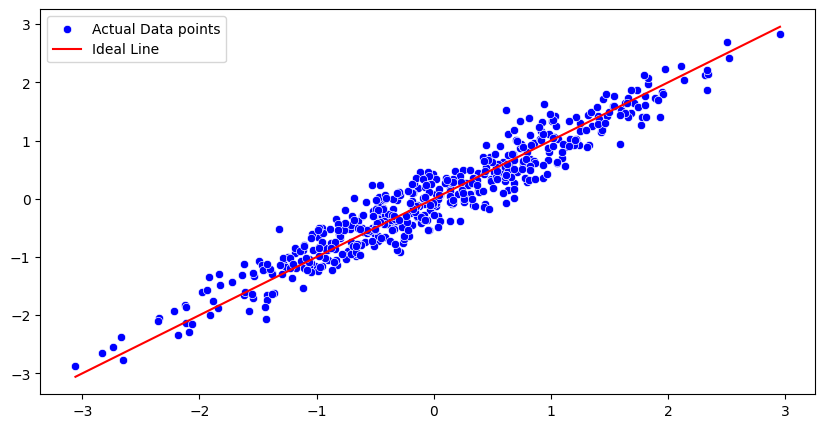

In [34]:
sns.scatterplot(x = y_test, y = y_pred, color = 'blue', label = "Actual Data points" )
plt.plot([min(y_test) , max(y_test)], [min(y_test) , max(y_test)], color = "red", label= "Ideal Line")
plt.legend()
plt.show()

In [35]:
## Combine Actual values and predicted Values Side by Side
result = np.column_stack([y_test, y_pred])
print("Actual Values  | Predicted Values ")
print("  ----------------------------")
for actual , predicted in result:
    print(f"{actual: 14.2f} | {predicted: 12.2f}")
residuals  = actual - y_pred.reshape(-1)
residuals

Actual Values  | Predicted Values 
  ----------------------------
          0.06 |         0.07
         -1.02 |        -1.16
          1.32 |         1.44
         -0.48 |        -0.73
         -0.80 |        -0.67
         -1.42 |        -1.66
         -0.18 |        -0.45
         -1.49 |        -1.06
          0.76 |         0.60
          0.16 |        -0.09
          0.59 |         0.63
          0.13 |         0.18
          1.48 |         1.43
          0.79 |         0.30
          0.59 |         0.44
         -0.32 |        -0.03
         -1.43 |        -1.75
         -0.26 |        -0.76
         -0.45 |        -0.03
          0.44 |        -0.10
         -2.34 |        -2.05
          0.62 |         1.52
          1.54 |         1.76
         -0.09 |        -0.10
         -0.36 |        -0.47
          1.71 |         1.64
          1.60 |         1.52
          0.54 |         0.59
          0.38 |         0.44
          0.74 |         0.87
         -1.72 |        -1.42
    

array([-1.26876078e+00, -3.67213417e-02, -2.63497621e+00, -4.64503078e-01,
       -5.23383202e-01,  4.62743386e-01, -7.51359388e-01, -1.34084535e-01,
       -1.80107444e+00, -1.11228062e+00, -1.82777327e+00, -1.38058992e+00,
       -2.62753728e+00, -1.49419403e+00, -1.63462988e+00, -1.17253464e+00,
        5.47408671e-01, -4.40108473e-01, -1.16941437e+00, -1.10005854e+00,
        8.56355948e-01, -2.71543838e+00, -2.96165591e+00, -1.10285974e+00,
       -7.25789670e-01, -2.83525537e+00, -2.71525681e+00, -1.78723727e+00,
       -1.63418384e+00, -2.06991916e+00,  2.25327554e-01, -2.67731787e+00,
       -1.85835411e+00, -6.14306309e-01, -1.34357756e+00, -3.07484172e-01,
       -1.06649333e+00, -5.40997901e-01, -1.47337794e+00,  7.04051304e-02,
       -1.65232681e+00,  6.58633397e-01, -4.06251973e-02, -3.07229814e+00,
       -2.44261636e+00, -4.40687483e-01, -9.06756841e-01,  4.68619823e-02,
       -9.92007588e-01, -1.88083095e+00, -1.84208098e+00, -1.00648416e+00,
       -8.20295648e-01, -

### Distribution plot for Residual (difference between the actual and predicted values)
# Distribution plot for Residuals

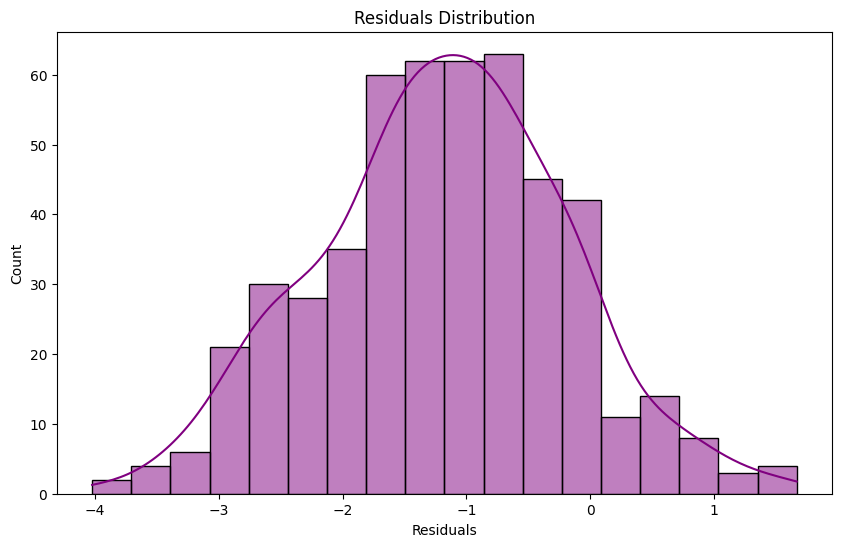

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


##### It represents that our model is not skewed as the distribution is center aligned .
# Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error
print("Linear Regression Model")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("--"*30)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error 0.07892981267498214
Root Mean Squared Error 0.2809445010584513


### We Always remembered that rmse must be nearly equal to the 0 then we got the good performance of the model .

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)


DecisionTreeRegressor()

In [39]:
# Predictiog the SalesPrice using the Testdata
y_pr_dt = dt.predict(x_test)

mse_dt = mean_squared_error(y_pr_dt, y_test)
print("Mean Squared Error Decision Tree : ", mse_dt)

Mean Squared Error Decision Tree :  0.2528537621645032


In [40]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)


RandomForestRegressor()

In [41]:
# Predictiog the SalesPrice using the Testdata
y_pr_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_pr_rf, y_test)
print("Mean Squared Random Forest Model : ", mse_rf)


Mean Squared Random Forest Model :  0.11405244364769618


In [42]:
# Gradient Boosting Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)


GradientBoostingRegressor()

In [43]:
y_pr_gb = gb.predict(x_test)
mse_gb = mean_squared_error(y_pr_gb, y_test)
print("Mean Squared Error : ", mse_gb)
# Sample Model Scores Replace these with your actual model scores
model_scores = {
    "Linear Regression": 0.07892981267498216 ,
    "Decision Tree" : 0.2455430374219466,
    "Random Forest" :  0.1132437351807332,
    "Gradient Boosting": 0.0965237909989741
}


Mean Squared Error :  0.09672311924988738


In [44]:
# Sort the Model Scores in Ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key = lambda x: x[1])
# Display the Ranking of the model
print("Model Ranking (lower values are better)")
for rank , (model_name, score) in enumerate(sorted_scores, start = 1):
    print(f"{rank}, {model_name}     : {score}")

Model Ranking (lower values are better)
1, Linear Regression     : 0.07892981267498216
2, Gradient Boosting     : 0.0965237909989741
3, Random Forest     : 0.1132437351807332
4, Decision Tree     : 0.2455430374219466


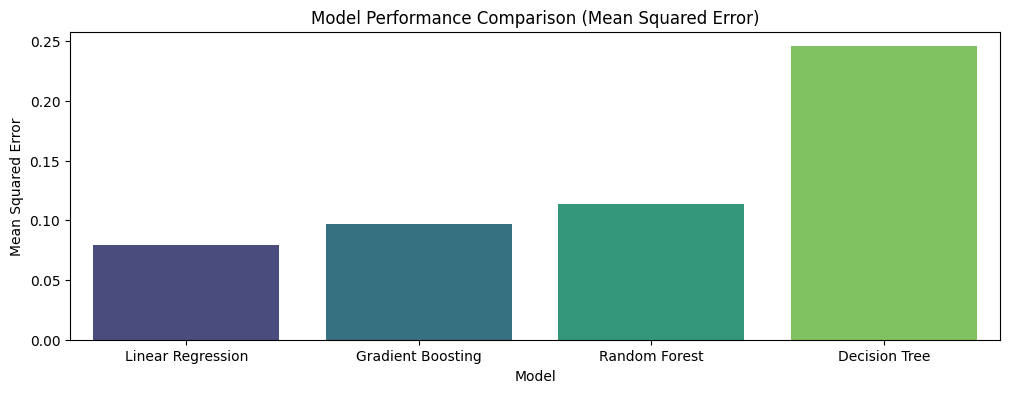

In [45]:
# Visualize model performance
model_names = [name for name, _ in sorted_scores]
model_mses = [score for _, score in sorted_scores]

plt.figure(figsize=(12, 4))
sns.barplot(x=model_names, y=model_mses, palette="viridis")
plt.title("Model Performance Comparison (Mean Squared Error)")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.show()